### Example 2: KMeans for color compression

• One interesting application of clustering is in color compression within images.

• For example, imagine you have an image with millions of colors.

• In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

• For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to have the pillow Python package installed).

• We begin with standard imports:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

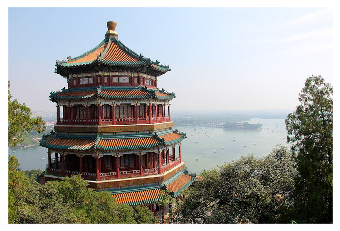

In [3]:
# Note: This requires the "pillow" package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

• The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [4]:
china.shape

(427, 640, 3)

• One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.

• We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:

In [9]:
data = china / 255.0 # Use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

• We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [17]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    # Choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(-0.1, 1), ylim=(-0.1, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(-0.1, 1), ylim=(-0.1, 1))
    
    fig.suptitle(title, size=20)

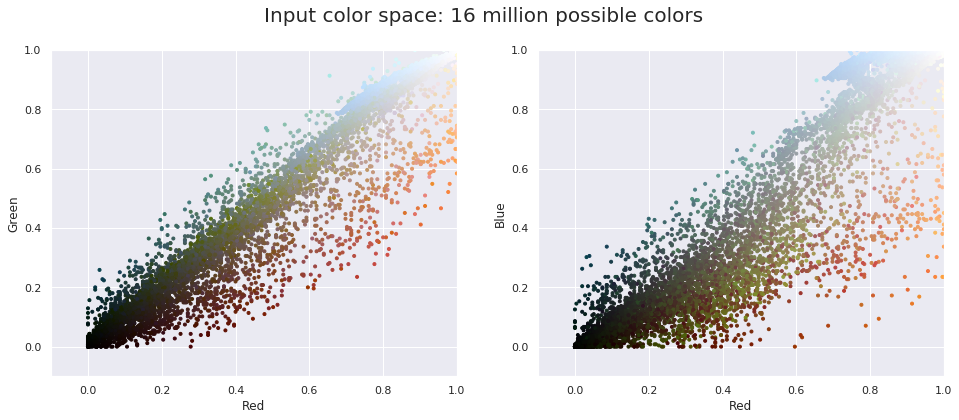

In [18]:
plot_pixels(data, title='Input color space: 16 million possible colors')